---
# pRF frequency

This notebook aims to unravel the frequency domain of our pRF-design, on which we can then base our filtering operations

In [1]:
from linescanning import utils,prf,dataset,plotting
from pRFline import fitting
import numpy as np
import warnings
import nibabel as nb
import matplotlib.pyplot as plt
from scipy import signal
import os
opj = os.path.join

warnings.simplefilter('ignore')
project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'hemifield')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 359
plot_xkcd = False
np.set_printoptions(precision=3)


/home/gjheij/anaconda3/envs/prfline/lib/python3.10/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/home/gjheij/anaconda3/envs/prfline/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
# Load data
sub         = '003'
ses         = 4
task        = "task-pRF"
run         = [2,5]
func_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func")
anat_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "anat")
prf_new     = opj(base_dir, 'derivatives', 'prf', f"sub-{sub}", f"ses-{ses}")

if not os.path.exists(prf_new):
    os.makedirs(prf_new, exist_ok=True)

Use `fitting.FitLines()`-class, which inherits from `linescanning.dataset.Dataset`, to read in the functional files, and average across runs and iterations

In [8]:
func_files = utils.get_file_from_substring(["task-pRF", "bold.mat"], func_dir, exclude="run-2")
# log_dir = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs"
log_dir = "/mnt/d/FSL/shared/spinoza/programs/project_repos/LineExps/lineprf/logs/sub-003_ses-4_task-pRF_run-imgs"

line_fit = fitting.FitLines(func_files=func_files,
                            TR=0.105,
                            low_pass=True,
                            high_pass=True,
                            window_size=39,
                            poly_order=3,
                            log_dir=log_dir,
                            stage='grid+iter',
                            model='norm',
                            baseline_duration=20,
                            iter_duration=240,
                            n_iterations=2,
                            verbose=True,
                            filter="lowpass",
                            ribbon=[356,363],
                            fmri_output="filt+psc")

line_fit.fit()

DATASET

FUNCTIONAL
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-4_bold.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Savitsky-Golay low pass filter [removes high frequences] (window = 39, order = 3)
 Data used for percent-change: 'lowpass'
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-5_bold.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Savitsky-Golay low pass filter [removes high frequences] (window = 39, order = 3)
 Data used for percent-change: 'lowpass'
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-6_bold.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Savitsky-Golay low pass filter [removes high frequences] (window = 39, order = 3)
 Data used for percent-chang

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   38.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   38.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   38.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   38.8s finished


Norm gridfit completed at 2022/02/28 16:55:40. Mean rsq>0.1: 0.6979889018195016
Gridfit took 0:00:38.762536
Save grid-fit parameters in /mnt/d/FSL/shared/spinoza/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/02/28 16:55:40


KeyboardInterrupt: 

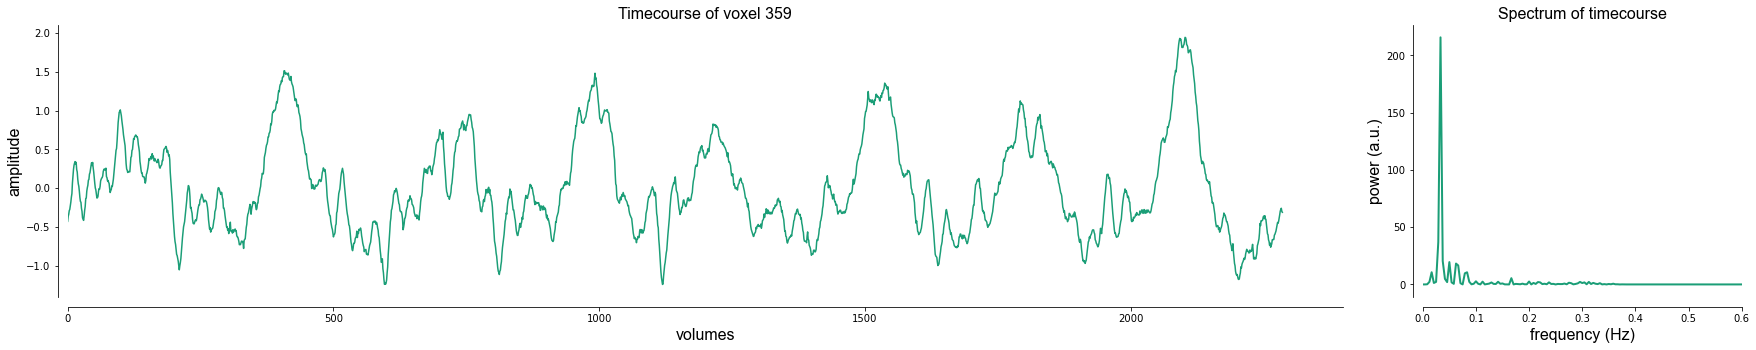

In [111]:
freq_type = "fft"
clipper = 5
tc1 = model_fit.avg_runs_iterations.mean(axis=-1)

fig = plt.figure(figsize=(30,5))
gs = fig.add_gridspec(1,2, width_ratios=[20,5], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot(tc1, 
                  color="#1B9E77",
                  x_label="volumes",
                  y_label="amplitude",
                  title="Timecourse of voxel 359",
                  axs=ax1,
                  font_size=16,
                  line_width=1.5)

ax2 = fig.add_subplot(gs[1])
tc1_freq = model_fit.get_freq(tc1, TR=0.105, spectrum_type=freq_type) #, clip_power=clipper)

plotting.LazyPlot(tc1_freq[1],
                  xx=tc1_freq[0],
                  color="#1B9E77",
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  title="Spectrum of timecourse",
                  axs=ax2,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0,0.6],
                  line_width=2)

fname = opj(os.path.dirname(anat_dir), "spectrum_after_retroicor.pdf")
# fig.savefig(fname)
